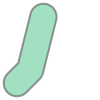

In [18]:
from shapely.geometry import Point, LineString
LineString([(0, 0), (1, 1),(2,5)]).buffer(1)

In [8]:
from geopandas import GeoDataFrame
from shapely.geometry import box
d=GeoDataFrame([{"h": "1", "geometry": box(1,1,2,2)},{"h": "2", "geometry": box(0,100,200,300)}])
d

,h,geometry
0,1,"POLYGON ((2.000 1.000, 2.000 2.000, 1.000 2.00..."
1,2,"POLYGON ((200.000 100.000, 200.000 300.000, 0...."


In [10]:
d.sindex.query(LineString([(0, 0), (1, 1),(100,100)]).buffer(1))

array([0, 1])

In [11]:
from pyproj import Transformer
transformer = Transformer.from_crs(4326, 3857,always_xy=True)
lng,lat=116.51172,39.92123
transformer.transform(lng,lat)


(12970025.341848467, 4854502.231468809)

In [23]:
import json
from shapely import wkt
import sys
h = LineString([(0, 0), (1, 1)]).buffer(1).wkb_hex
b=LineString([(0, 0), (1, 1)]).buffer(1).wkb
s = LineString([(0, 0), (1, 1)]).buffer(1).wkt
print(sys.getsizeof(h))
print(sys.getsizeof(b))
print(sys.getsizeof(s))

2219
1118
2599


In [36]:
from shapely import wkb
wkb.loads(b)
# wkt.loads(s)
from split import chop

for idx,v in enumerate(chop(2,{1,23,4,5,6,45,888,24,265,234,453,5,298})):
    print(idx,v)
print(Exception("a"))
LineString([(0, 0), (1, 1)]).buffer(1).wkt
print(*{1,2,3,4})

0 [1, 4]
1 [453, 5]
2 [6, 265]
3 [234, 298]
4 [45, 23]
5 [888, 24]
a
1 2 3 4


In [2]:
import pandas as pd
from geopandas import GeoDataFrame, read_file

import sys
sys.path.append("..")
import movingpandas as mpd
mpd.show_versions()

import warnings
warnings.simplefilter("ignore")


MovingPandas 0.9.rc3

SYSTEM INFO
-----------
python     : 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:53:57) [GCC 9.4.0]
executable : /home/liontao/miniconda3/envs/beam/bin/python
machine    : Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.31

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.10.2
GEOS lib   : /home/liontao/miniconda3/envs/beam/lib/libgeos_c.so
GDAL       : 3.4.1
GDAL data dir: /home/liontao/miniconda3/envs/beam/share/gdal
PROJ       : 8.2.1
PROJ data dir: /home/liontao/miniconda3/envs/beam/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.10.2
pandas     : 1.4.1
fiona      : 1.8.21
numpy      : 1.22.3
shapely    : 1.8.0
rtree      : 0.9.7
pyproj     : 3.3.0
matplotlib : 3.5.1
mapclassify: 2.4.3
geopy      : 2.2.0
holoviews  : 1.14.8
hvplot     : 0.7.3
geoviews   : 1.9.5
stonesoup  : 0.1b8


In [49]:
raw_df = pd.read_csv('data/all.txt', delimiter=',')
raw_df.columns = ['trajectory_id','t','X','Y']
traj_collection = mpd.TrajectoryCollection(raw_df, 'trajectory_id', t='t', x='X', y='Y')
splitted = mpd.TemporalSplitter(traj_collection).split(mode="day",min_length=50)

In [50]:
res=[t for t in filter(lambda x:x.size()<200 and x.size()>50 and x.get_length()<200000, splitted)]
len(res)

195

In [74]:
df = res[0].to_point_gdf()
df

,trajectory_id,geometry,X,Y
t,,,,
2008-02-03 00:00:32,1,POINT (116.69171 39.85184),116.69171,39.85184
2008-02-03 00:10:32,1,POINT (116.69170 39.85184),116.69170,39.85184
2008-02-03 00:20:32,1,POINT (116.69170 39.85184),116.69170,39.85184
2008-02-03 00:30:32,1,POINT (116.69168 39.85146),116.69168,39.85146
2008-02-03 00:40:32,1,POINT (116.69172 39.85165),116.69172,39.85165
...,...,...,...,...
2008-02-03 23:15:12,1,POINT (116.69160 39.85181),116.69160,39.85181
2008-02-03 23:25:12,1,POINT (116.69163 39.85195),116.69163,39.85195
2008-02-03 23:35:13,1,POINT (116.69159 39.85173),116.69159,39.85173


In [ ]:
df=df.reset_index()
df['X']=df["geometry"].x
df['Y']=df["geometry"].y
df.columns
df.to_csv(columns=["trajectory_id","t","X","Y"],header=False,index=False)

In [78]:
from tqdm.autonotebook import tqdm
for i,t in enumerate(tqdm(res)):
    df = t.to_point_gdf().reset_index()
    df['X']=df["geometry"].x
    df['Y']=df["geometry"].y
    df["trajectory_id"]=i+1
    with open(f"data/filtered/{i+1}.txt",'w') as f:
        df.to_csv(f,columns=["trajectory_id","t","X","Y"],header=False,index=False)

100%|██████████| 195/195 [00:00<00:00, 451.33it/s]


In [1]:
c=0
for i in range(1,151):
    with open(f"data/filtered/{i}.txt") as f:
        c+=len(f.readlines())
c

17712

In [1]:
import json
import pandas as pd
bucket = []
for i in range(200,1001,100):
    with open(f"/mnt/g/Tencent/results_backup/{i}_0.2_2000.json") as f:
        bucket.append(json.load(f))
df=pd.DataFrame(bucket)
df = df.rename(columns={"t1":"insertion time","t2":"query time"})
df.to_excel("/mnt/g/Tencent/results_backup/m-varient.xlsx",columns=["insertion time","query time","tps","latency"])

In [8]:
%%bash
for i in {1..10}
do
((p=3000+$i))
echo $p
done

3001
3002
3003
3004
3005
3006
3007
3008
3009
3010


In [1]:
from copy import deepcopy
import os
trajectories=list(range(1,101))
settings=[]
template = {
        "result_file_name": "test",
        "trajectories": trajectories,
        "INIT_RESOLUTION": 1,
        "MAX_BUFFER_SIZE": 500,
        "TREE_INSERTION_THRESHOLD": 0.2,
        "SPLIT_THRESHOLD": 2000
}
settings = []
for m in [0, 2, 20, 200, 500, 700]:
    temp = deepcopy(template)
    temp["MAX_BUFFER_SIZE"] = m
    temp[
        "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    settings.append(temp)
for i in [0,5,10]:
    temp = deepcopy(template)
    temp["INIT_RESOLUTION"] = i
    temp[
        "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    settings.append(temp)


In [34]:
from glob import iglob
import json
res=dict()
query_all=dict()
tops_all=dict()
for s in settings:
    if os.path.exists(f"tests/results/{s['result_file_name']}.json"):
        query=[]
        tops=[]
        with open(f"tests/results/{s['result_file_name']}.json") as f:
            res[s['result_file_name']]=json.load(f)
        for fname in iglob(os.path.abspath(f"tests/results/{s['result_file_name']}*")):
            if "top" in fname:
                with open(fname) as f:
                    tops.append(json.load(f))
            elif "query" in fname:
                with open(fname) as f:
                    query.append(json.load(f))
        query_all[s['result_file_name']]=query
        tops_all[s['result_file_name']]=tops

In [36]:
import pandas as pd
for s in settings:
    m,r,k,resolution = s['result_file_name'].split("_")[:5]
    # res_df = pd.DataFrame(res[s['result_file_name']])
    # res_df["M"]=m
    # res_df["R"]=r
    # res_df["K"]=k
    # res_df["init_resolution"]=resolution
    query_df = pd.DataFrame(query_all[s['result_file_name']])
    query_df["M"]=m
    query_df["R"]=r
    query_df["K"]=k
    query_df["init_resolution"]=resolution
    query_df=query_df.set_index("time")
    query_df.to_excel(f"{s['result_file_name']}_query.xlsx")
    top_df = pd.DataFrame(tops_all[s['result_file_name']])
    top_df["M"]=m
    top_df["R"]=r
    top_df["K"]=k
    top_df["init_resolution"]=resolution
    top_df=top_df.set_index("time")
    top_df.to_excel(f"{s['result_file_name']}_top.xlsx")
    


In [42]:
res=[]
for m in [0, 2, 20, 200, 500, 700]:
    temp = deepcopy(template)
    temp["MAX_BUFFER_SIZE"] = m
    temp["result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    m,r,k,resolution = temp["result_file_name"].split("_")[:5]
    with open(f"tests/results/{temp['result_file_name']}.json") as f:
        data=json.load(f)
        data["M"]=m
        data["R"]=r
        data["K"]=k
        data["init_resolution"]=resolution
        res.append(data)
pd.DataFrame(res).to_excel("m.xlsx")

res=[]
for i in [0,5,10]:
    temp = deepcopy(template)
    temp["INIT_RESOLUTION"] = i
    temp[
        "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    m,r,k,resolution = temp["result_file_name"].split("_")[:5]
    with open(f"tests/results/{temp['result_file_name']}.json") as f:
        data=json.load(f)
        data["M"]=m
        data["R"]=r
        data["K"]=k
        data["init_resolution"]=resolution
        res.append(data)
pd.DataFrame(res).to_excel("init_resolution.xlsx")

In [2]:
# 有关SPLIT_THRESHOLD的插入时间图表
# index是分裂阈值：[1000, 1500, 2000, 2500, 3000]
# 横坐标是init_resolution=1
# 一张图是默认参数，m=500
# 另一张图是特殊参数，m=0
import json
import pandas as  pd
settings_default=[]
settings_nonbuffer=[]
for k in [1000, 1500, 2000, 2500, 3000]:
    temp = deepcopy(template)
    temp["SPLIT_THRESHOLD"] = k
    temp[
        "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    settings_default.append(temp)
    temp = deepcopy(temp)
    temp["MAX_BUFFER_SIZE"] = 0
    temp[
        "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    settings_nonbuffer.append(temp)

bucket = []
for fname in settings_default:
    m,r,k,resolution = fname["result_file_name"].split("_")[:5]
    with open(f"tests/results/{fname['result_file_name']}.json") as f:
        data=json.load(f)
        data["M"]=m
        data["R"]=r
        data["K"]=k
        data["init_resolution"]=resolution
        bucket.append(data)
pd.DataFrame(bucket).set_index("K").to_excel("开启缓冲k变量的插入时间-init=10.xlsx",columns=["insertion_time"])

bucket = []
for fname in settings_nonbuffer:
    m,r,k,resolution = fname["result_file_name"].split("_")[:5]
    with open(f"tests/results/{fname['result_file_name']}.json") as f:
        data=json.load(f)
        data["M"]=m
        data["R"]=r
        data["K"]=k
        data["init_resolution"]=resolution
        bucket.append(data)
pd.DataFrame(bucket).set_index("K").to_excel("关闭缓冲k变量的插入时间-init=10.xlsx",columns=["insertion_time"])

In [4]:
# 有关SPLIT_THRESHOLD的性能监控
# 有buffer部分
from glob import iglob
top_res = []
query_res=[]
for s in settings_default:
    tops=[]
    query=[]
    for fname in iglob(os.path.abspath(f"tests/results/{s['result_file_name']}*")):
        if "top" in fname:
            with open(fname) as f:
                tops.append(json.load(f))
        elif "query" in fname:
            with open(fname) as f:
                query.append(json.load(f))
    m,r,k,resolution = s["result_file_name"].split("_")[:5]
    tops = pd.DataFrame(tops)
    cpu_avg = tops.mean(axis=0)["cpu"]
    mem_avg = tops.mean(axis=0)["mem"]
    top_res.append({"K":k,"cpu_avg":cpu_avg,"mem_avg":mem_avg})
    query = pd.DataFrame(query)
    regions_avg = query.mean(axis=0)["regions"]
    tid_avg = query.mean(axis=0)["tid"]
    query_res.append({"K":k,"query_latency":regions_avg+tid_avg})
pd.DataFrame(top_res).set_index("K").to_excel("开启缓冲-k变量性能监控init=10.xlsx")
pd.DataFrame(query_res).set_index("K").to_excel("开启缓冲-k变量查询延迟init=10.xlsx")


/tmp/ipykernel_20848/1493171724.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_20848/1493171724.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tid_avg = query.mean(axis=0)["tid"]
/tmp/ipykernel_20848/1493171724.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_20848/1493171724.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (wit

In [5]:
# 有关SPLIT_THRESHOLD的性能监控
# 无buffer部分
top_res = []
query_res=[]
for s in settings_nonbuffer:
    tops=[]
    query=[]
    for fname in iglob(os.path.abspath(f"tests/results/{s['result_file_name']}*")):
        if "top" in fname:
            with open(fname) as f:
                tops.append(json.load(f))
        elif "query" in fname:
            with open(fname) as f:
                query.append(json.load(f))
    m,r,k,resolution = s["result_file_name"].split("_")[:5]
    tops = pd.DataFrame(tops)
    cpu_avg = tops.mean(axis=0)["cpu"]
    mem_avg = tops.mean(axis=0)["mem"]
    top_res.append({"K":k,"cpu_avg":cpu_avg,"mem_avg":mem_avg})
    query = pd.DataFrame(query)
    regions_avg = query.mean(axis=0)["regions"]
    tid_avg = query.mean(axis=0)["tid"]
    query_res.append({"K":k,"query_latency":regions_avg+tid_avg})
pd.DataFrame(top_res).set_index("K").to_excel("关闭缓冲-k变量性能监控init=10.xlsx")
pd.DataFrame(query_res).set_index("K").to_excel("关闭缓冲-k变量查询延迟init=10.xlsx")

/tmp/ipykernel_20848/3430710689.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_20848/3430710689.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tid_avg = query.mean(axis=0)["tid"]
/tmp/ipykernel_20848/3430710689.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_20848/3430710689.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (wit

In [6]:
# 有关TREE_INSERTION_THRESHOLD的插入时间图表
# TREE_INSERTION_THRESHOLD是插入阈值：[1000, 1500, 2000, 2500, 3000]
# 横坐标是init_resolution=1
# 默认参数，m=500
import json
import pandas as  pd
settings_default=[]
for t in [0, 0.1, 0.3, 0.5, 0.9]:
    temp = deepcopy(template)
    temp["TREE_INSERTION_THRESHOLD"] = t
    temp[
        "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    settings_default.append(temp)
    

bucket = []
for fname in settings_default:
    m,r,k,resolution = fname["result_file_name"].split("_")[:5]
    print(f"{resolution=}")
    with open(f"tests/results/{fname['result_file_name']}.json") as f:
        data=json.load(f)
        data["M"]=m
        data["R"]=r
        data["K"]=k
        data["init_resolution"]=resolution
        bucket.append(data)
pd.DataFrame(bucket).set_index("R").to_excel("r变量的插入时间init=10.xlsx",columns=["insertion_time"])

resolution='10'
resolution='10'
resolution='10'
resolution='10'
resolution='10'


In [7]:
# 有关TREE_INSERTION_THRESHOLD的性能监控
top_res = []
query_res=[]
for s in settings_default:
    tops=[]
    query=[]
    for fname in iglob(os.path.abspath(f"tests/results/{s['result_file_name']}*")):
        if "top" in fname:
            with open(fname) as f:
                tops.append(json.load(f))
        elif "query" in fname:
            with open(fname) as f:
                query.append(json.load(f))
    m,r,k,resolution = s["result_file_name"].split("_")[:5]
    tops = pd.DataFrame(tops)
    cpu_avg = tops.mean(axis=0)["cpu"]
    mem_avg = tops.mean(axis=0)["mem"]
    top_res.append({"R":r,"cpu_avg":cpu_avg,"mem_avg":mem_avg})
    query = pd.DataFrame(query)
    regions_avg = query.mean(axis=0)["regions"]
    tid_avg = query.mean(axis=0)["tid"]
    query_res.append({"R":r,"query_latency":regions_avg+tid_avg})
pd.DataFrame(top_res).set_index("R").to_excel("r变量性能监控init=10.xlsx")
pd.DataFrame(query_res).set_index("R").to_excel("r变量查询延迟init=10.xlsx")


/tmp/ipykernel_20848/1104950859.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_20848/1104950859.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tid_avg = query.mean(axis=0)["tid"]
/tmp/ipykernel_20848/1104950859.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_20848/1104950859.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (wit

In [100]:
#baseline 朴素rtree
temp = deepcopy(template)
temp["SPLIT_THRESHOLD"] = float('inf')
temp["TREE_INSERTION_THRESHOLD"] = 0
temp["MAX_BUFFER_SIZE"] = 0
temp["INIT_RESOLUTION"] = 0
temp[
    "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'

m,r,k,resolution = temp["result_file_name"].split("_")[:5]
with open(f"tests/results/{temp['result_file_name']}.json") as f:
    data=json.load(f)
print("insertion time:",data["insertion_time"])

top_res = []
query_res=[]
for s in [temp]:
    tops=[]
    query=[]
    for fname in iglob(os.path.abspath(f"tests/results/{s['result_file_name']}*")):
        if "top" in fname:
            with open(fname) as f:
                tops.append(json.load(f))
        elif "query" in fname:
            with open(fname) as f:
                query.append(json.load(f))
    m,r,k,resolution = s["result_file_name"].split("_")[:5]
    tops = pd.DataFrame(tops)
    cpu_avg = tops.mean(axis=0)["cpu"]
    mem_avg = tops.mean(axis=0)["mem"]
    top_res.append({"R":r,"cpu_avg":cpu_avg,"mem_avg":mem_avg})
    query = pd.DataFrame(query)
    regions_avg = query.mean(axis=0)["regions"]
    tid_avg = query.mean(axis=0)["tid"]
    query_res.append({"R":r,"query_latency":regions_avg+tid_avg})
pd.DataFrame(top_res).set_index("R")#.to_excel("r变量性能监控.xlsx")
# pd.DataFrame(query_res).set_index("R").to_excel("r变量查询延迟.xlsx")

insertion time: 2330.354618311998


/tmp/ipykernel_30279/1005184627.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_30279/1005184627.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tid_avg = query.mean(axis=0)["tid"]


,cpu_avg,mem_avg
R,,
0,6.042857,14.838095


In [2]:
# 有关MAX_BUFFER_SIZE的插入时间图表
# MAX_BUFFER_SIZE是插入阈值：[0, 2, 20, 200, 500, 700]
# 横坐标是init_resolution=5
# 默认参数，k=2000,r=0.2
import json
import pandas as  pd
settings_default=[]
# for m in [0, 2, 20, 200, 500, 700]:
for m in [500]:
    temp = deepcopy(template)
    temp["MAX_BUFFER_SIZE"] = m
    temp[
        "result_file_name"] = f'{temp["MAX_BUFFER_SIZE"]}_{temp["TREE_INSERTION_THRESHOLD"]}_{temp["SPLIT_THRESHOLD"]}_{temp["INIT_RESOLUTION"]}'
    settings_default.append(temp)
    

bucket = []
for fname in settings_default:
    m,r,k,resolution = fname["result_file_name"].split("_")[:5]
    with open(f"tests/results/{fname['result_file_name']}.json") as f:
        data=json.load(f)
        data["M"]=m
        data["R"]=r
        data["K"]=k
        data["init_resolution"]=resolution
        bucket.append(data)
pd.DataFrame(bucket).set_index("M").to_excel("m变量的插入时间-init=1.xlsx",columns=["insertion_time"])

In [3]:
# 有关MAX_BUFFER_SIZE的性能监控
from glob import iglob
top_res = []
query_res=[]
for s in settings_default:
    tops=[]
    query=[]
    for fname in iglob(os.path.abspath(f"tests/results/{s['result_file_name']}*")):
        if "top" in fname:
            with open(fname) as f:
                tops.append(json.load(f))
        elif "query" in fname:
            with open(fname) as f:
                query.append(json.load(f))
    m,r,k,resolution = s["result_file_name"].split("_")[:5]
    tops = pd.DataFrame(tops)
    cpu_avg = tops.mean(axis=0)["cpu"]
    mem_avg = tops.mean(axis=0)["mem"]
    top_res.append({"M":m,"cpu_avg":cpu_avg,"mem_avg":mem_avg})
    query = pd.DataFrame(query)
    regions_avg = query.mean(axis=0)["regions"]
    tid_avg = query.mean(axis=0)["tid"]
    query_res.append({"M":m,"query_latency":regions_avg+tid_avg})
pd.DataFrame(top_res).set_index("M").to_excel("m变量性能监控-init=1.xlsx")
pd.DataFrame(query_res).set_index("M").to_excel("m变量查询延迟-init=1.xlsx")


/tmp/ipykernel_1502/2254837507.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  regions_avg = query.mean(axis=0)["regions"]
/tmp/ipykernel_1502/2254837507.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tid_avg = query.mean(axis=0)["tid"]


<AxesSubplot:>

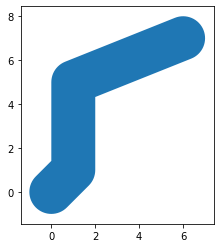

In [17]:
from shapely.geometry import LineString
from geopandas import GeoDataFrame
trajectory = LineString([(0,0),(1,1),(1,5),(6,7)])
GeoDataFrame({"geometry":[trajectory,trajectory.buffer(1)]}).plot()

In [4]:
# 变更查询阈值实验处理
import json
with open("tests/results/our_solution.json") as f:
    data = json.load(f)
res = []
for k,v in data.items():
    res.append(v["resp"]["regions"]+v["resp"]["tid"])  
print("our",sum(res)/len(res),max(res))

with open("tests/results/plain.json") as f:
    data = json.load(f)
res = []
for k,v in data.items():
    res.append(v["resp"]["regions"]+v["resp"]["tid"])  
print("plain",sum(res)/len(res),max(res))

our 0.3989702358012437
plain 0.23557926720386604
